In [3]:
import pandas as pd
import re 
import string

# Load the uploaded spam.csv file
df = pd.read_csv('spam.csv', encoding='latin-1')

# Display the first few rows
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [4]:
def preprocess_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = text.strip()  # remove extra spaces
    return text


In [5]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df['cleaned_message'] = df['message'].apply(preprocess_text)

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_num'] = le.fit_transform(df['label'])  # ham=0, spam=1


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_message'])
y = df['label_num']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


y_pred = model.predict(X_test)

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))  
print("Recall:", recall_score(y_test, y_pred))       
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9623318385650225
Precision: 0.9908256880733946
Recall: 0.7248322147651006
F1 Score: 0.8372093023255814

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.72      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115


Confusion Matrix:
[[965   1]
 [ 41 108]]


In [11]:
def predict_spam(text):
    
    cleaned = preprocess_text(text)
    
    vec = vectorizer.transform([cleaned])
    
    pred = model.predict(vec)[0]
    prob = model.predict_proba(vec)[0]
    label = "Spam" if pred == 1 else "Not Spam"
    confidence = max(prob)
    print(f"Message: {text}")
    print(f"Prediction: {label} (Confidence: {confidence:.2f})\n")


predict_spam("Congratulations! You've won $1000! Click now to claim!")
predict_spam("Hi, are we still meeting for lunch tomorrow?")
predict_spam("Free entry in 2 a weekly comp to win FA Cup final tickets.")

Message: Congratulations! You've won $1000! Click now to claim!
Prediction: Spam (Confidence: 0.65)

Message: Hi, are we still meeting for lunch tomorrow?
Prediction: Not Spam (Confidence: 0.97)

Message: Free entry in 2 a weekly comp to win FA Cup final tickets.
Prediction: Not Spam (Confidence: 0.52)



In [12]:
import joblib

joblib.dump(model, 'spam_classifier_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print(" Model and vectorizer saved!")

 Model and vectorizer saved!


In [13]:

model = joblib.load('spam_classifier_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

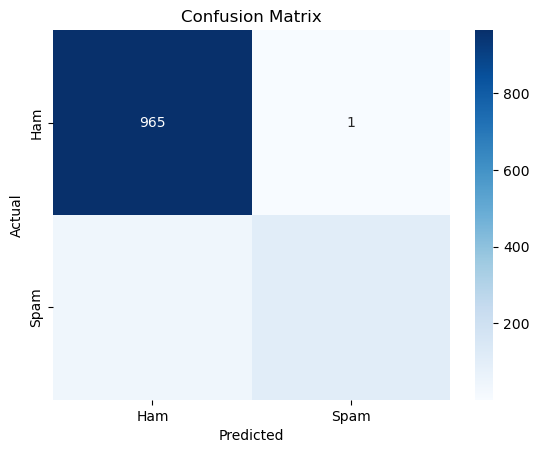

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()